In [4]:
!pip install snscrape
!pip install pycountry
!pip install langdetect 
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import csv
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction



     |████████████████████████████████| 10.1 MB 6.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=be80fdcd3f8ef77de1e1b9e3ca3aa10cc1a24ca3bd172364f4dec9960a7e55c7
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
     |████████████████████████████████| 981 kB 7.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=1c9238aed82b354f702fcb2986de6db1489ab7056fb8830cbb93f41ed2a2828c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def scrape(words, date_since, numtweet):
        # Creating DataFrame using pandas
    db = pd.DataFrame(columns=[
                                   'description',
                                   'location',
                                   'retweetcount',
                                   'text',
                                    'date',
                                   'hashtags'])
 
        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                            #until=date_until,
                               tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
    list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
    i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
    for tweet in list_tweets[::-1]:
        description = tweet.user.description
        location = tweet.user.location
        retweetcount = tweet.retweet_count
        date=tweet.created_at
        hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the
                # extracted information in the DataFrame
        ith_tweet = [description,location,retweetcount, text,date, hashtext]
        db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
        
        # printtweetdata(i, ith_tweet)
        i = i+1
    filename = 'ptsd.csv'
        
    
    df=pd.DataFrame(db)
    
    #df=df.loc[(df['date'] < '2021-07-01')]
    
    
    csv=df.to_csv(filename)
        
    
        # we will save our database as a CSV file.
 


        # Enter your own credentials obtained
        # from your developer account
consumerKey = 'XI6QiXqHXjtvW0iIy7xTO2eYK'
consumerSecret = 'rAoUFudHY9YhNZRwG4yVR8TxBKpe2zqsTIpShGxNW1xvktALEh'
accessToken = '1482549115242389506-dsTM3FwcaAPqwupZ8e9MiAuxh41zQJ'
accessTokenSecret = 'SKoqrjICuRgv4bMpcXXJr5faXUGcndhLGxmHotvwT3CEC'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
 
        # Enter Hashtag and initial date
#    print("Enter Twitter HashTag to search for")
#    words = input()
words = 'PTSD'
    
since_date=pd.to_datetime('2020-01-01')
# number of tweets you want to extract in one run
numtweet = 500
scrape(words, since_date, numtweet)

print('Scraping has completed!')

In [ ]:
def scrape(words, date_since, numtweet):
        # Creating DataFrame using pandas
    db = pd.DataFrame(columns=[
                                   'description',
                                   'location',
                                   'retweetcount',
                                   'text',
                                    'date',
                                   'hashtags'])
 
        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                            #until=date_until,
                               tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
    list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
    i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
    for tweet in list_tweets[::-1]:
        description = tweet.user.description
        location = tweet.user.location
        retweetcount = tweet.retweet_count
        date=tweet.created_at
        hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the
                # extracted information in the DataFrame
        ith_tweet = [description,location,retweetcount, text,date, hashtext]
        db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
        
        # printtweetdata(i, ith_tweet)
        i = i+1
    filename = 'Depression.csv'
        
    
    df=pd.DataFrame(db)
    
    #df=df.loc[(df['date'] < '2021-07-01')]
    
    
    csv=df.to_csv(filename)
        
    
        # we will save our database as a CSV file.
 


        # Enter your own credentials obtained
        # from your developer account
consumerKey = 'XI6QiXqHXjtvW0iIy7xTO2eYK'
consumerSecret = 'rAoUFudHY9YhNZRwG4yVR8TxBKpe2zqsTIpShGxNW1xvktALEh'
accessToken = '1482549115242389506-dsTM3FwcaAPqwupZ8e9MiAuxh41zQJ'
accessTokenSecret = 'SKoqrjICuRgv4bMpcXXJr5faXUGcndhLGxmHotvwT3CEC'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
 
        # Enter Hashtag and initial date
#    print("Enter Twitter HashTag to search for")
#    words = input()
words = 'Depression'
    
since_date=pd.to_datetime('2020-01-01')
# number of tweets you want to extract in one run
numtweet = 500
scrape(words, since_date, numtweet)

print('Scraping has completed!')

In [5]:
df=pd.read_csv('/content/ptsd.csv')  

In [6]:
df.head()

,Unnamed: 0,description,location,retweetcount,text,date,hashtags
0,0,Conducting a UK-based research project around ...,NaN,4,"Dads, Traumatic Births and PTSD. \nAs part of ...",2022-04-30 15:22:53+00:00,[]
1,1,✨i was feeling epic✨,where the money at,0,how crazy is it that i see all my friends wort...,2022-04-30 15:23:02+00:00,[]
2,2,NaN,in between life and death,0,2nd session with my new therapist: yeah hun th...,2022-04-30 15:23:20+00:00,[]
3,3,Sports:\n#NYR\n#LetsGoOilers\n#NYG\n#NYY #RepB...,OLD Harlem/South Charlotte,1,Watching #AtlantaFX from the other night...\n\...,2022-04-30 15:23:25+00:00,['AtlantaFX']
4,4,I'm not a guy.\nArchitecture is giving me head...,NaN,0,"@zussoo I try not to because it gives me ""PTSD""",2022-04-30 15:23:25+00:00,[]


In [7]:
import re
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Removed @mentions
    text = re.sub(r'#','',text) #Removing the # symbols
    text = re.sub(r':','',text) #Removing the : symbols
    text = re.sub(r'_','',text) #Removing the : symbols
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','', text) # Removing the hyper link
    return text
df['text']=df['text'].apply(cleanText)

In [13]:
import numpy as np
import json
import glob
!pip install pyLDAvis
!pip install pyLDAvis.gensim
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f84b898b557053e5dc59168326f20ffa3920a92edd5351ebdf2f3d4fb871e1ba
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stopwords = stopwords.words("english")

In [15]:
print (stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


In [16]:
data=df['text']
print (data[0][0:90])

Dads, Traumatic Births and PTSD. 
As part of the  UK Maternal Mental Health Awareness Week


In [17]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[0][0:90])

dad traumatic part delighted work important session dad traumatic 7th p.m. thepowerofconne


In [18]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['dad', 'traumatic', 'part', 'delighted', 'work', 'important', 'session', 'dad', 'traumatic', 'th', 'https', 'co', 'seh']


In [19]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


['dad', 'traumatic', 'part', 'delighted', 'work', 'important', 'session', 'dad', 'traumatic', 'th', 'https_co', 'seh']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [21]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [22]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['traumatic', 'part', 'delight', 'work', 'important', 'session', 'dad', 'traumatic', 'seh']]


In [23]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1)]]


In [24]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('dad', 1),
  ('delight', 1),
  ('important', 1),
  ('part', 1),
  ('seh', 1),
  ('session', 1),
  ('traumatic', 2),
  ('work', 1)]]

In [25]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [26]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.039*"parent" + 0.032*"give" + 0.016*"ask" + 0.015*"positivity" + 0.015*"child" + 0.014*"mental" + 0.014*"put" + 0.010*"health_issue" + 0.010*"sit" + 0.008*"amp"'), (1, '0.025*"need" + 0.021*"year" + 0.018*"help" + 0.016*"depression" + 0.015*"suffer" + 0.013*"life" + 0.011*"watch" + 0.011*"away" + 0.010*"hear" + 0.009*"good"'), (2, '0.035*"get" + 0.028*"still" + 0.026*"help" + 0.025*"think" + 0.020*"ptsd" + 0.019*"block" + 0.018*"deliver" + 0.017*"would" + 0.017*"anytime_message" + 0.015*"take"'), (3, '0.024*"make" + 0.019*"people" + 0.015*"also" + 0.011*"go" + 0.010*"abuse" + 0.010*"ptsd" + 0.010*"suffer" + 0.009*"say" + 0.009*"back" + 0.008*"veteran"')]


In [72]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.6824,"depression, anxiety, good, help, life, make, t...",Depression isn’t always looking and feeling sa...
1,1,1.0,0.8778,"depression, anxiety, good, help, life, make, t...","""Hehehe now that's some power level I see!... ..."
2,2,3.0,0.9018,"depression, take, say, cause, save, life, suic...",How To Stimulate Your Vagus Nerve for Better M...
3,3,2.0,0.3969,"depression, anxiety, much, help, time, work, g...",depression as a red flag lmao https//t.co/xc7E...
4,4,3.0,0.7548,"depression, take, say, cause, save, life, suic...",☏ Houston County Board of Education says menta...


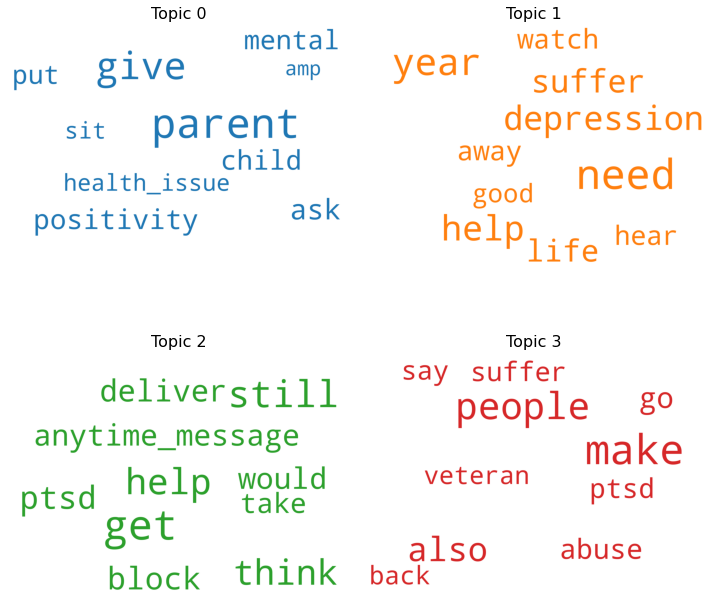

In [28]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()



In [29]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.959298070888763

Coherence Score:  0.4283248261505283


In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.225921 -0.018030       1        1  31.098149
3     -0.098339 -0.108439       2        1  25.741885
1     -0.068972 -0.079317       3        1  24.079499
0     -0.058610  0.205785       4        1  19.080467, topic_info=       Term       Freq      Total Category  logprob  loglift
144     get  49.000000  49.000000  Default  30.0000  30.0000
64   parent  33.000000  33.000000  Default  29.0000  29.0000
277    need  27.000000  27.000000  Default  28.0000  28.0000
47     make  27.000000  27.000000  Default  27.0000  27.0000
36     give  43.000000  43.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
406    care   5.762518   9.701855   Topic4  -4.9944   1.1356
151  change   3.304467   4.452209   Topic4  -5.5505   1.3584
292   woman   3.638281   5.783203   Topic4  -5.4542   1.1931
132      go   4.474049  36.110778   Topic4  -5.2474  -0.4318
110   think   4.539132  52.927492   Topic4  -5.2330  -0.7997

[202 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
464       2  0.933379  ability
85        2  0.747850    abuse
85        3  0.249283    abuse
388       1  0.208256   action
388       4  0.833025   action
...     ...       ...      ...
141       1  0.965001    would
228       2  0.660132    wrong
228       3  0.220044    wrong
79        2  0.180805     year
79        3  0.795542     year

[201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [33]:
df=pd.read_csv('/content/Depression.csv')

In [34]:
df['text']=df['text'].apply(cleanText)

In [38]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(text):
  return(bigram[doc] for doc in text)
def make_trigrams(text):
  return(trigram[bigram[doc]] for doc in text)

data_bigrams=make_bigrams(data_words)
data_bigrams_trigrams=make_trigrams(data_words)
#print(data_bigrams_trigrams[0][0:20])
print(trigram_mod[bigram_mod[data_words[0]]])

['dad', 'traumatic', 'part', 'delighted', 'work', 'important', 'session', 'dad', 'traumatic', 'th', 'https_co', 'seh']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [39]:
#tf-idf removal
from gensim.models import TfidfModel
id2word=corpora.Dictionary(data_bigrams_trigrams)
texts=data_bigrams_trigrams
corpus=[id2word.doc2bow(text) for text in texts]
#print(corpus[0][0:20])

tfidf=TfidfModel(corpus,id2word=id2word)

low_value=0.03
words_missing_in_tfidf=[]
for i in range(0,len(corpus)):
  bow=corpus[i]
  low_value_words=[]
  tfidf_ids=[id for id,vlaue in tfidf[bow]]
  bow_ids=[id for id,vlue in bow]
  low_value_words=[id for id,value in tfidf[bow] if value < low_value]
  drops=low_value_words+words_missing_in_tfidf
  for item in drops:
    words_missing_in_tfidf=[id for id in bow_ids if id not in tfidf_ids]
    new_bow=[b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i]=new_bow

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [41]:
data=df['text']
print (data[0][0:90])

Depression isn’t always looking and feeling sad. Sometimes it’s lack of motivation, excess


In [42]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[0][0:90])

depression always look feel sad sometimes ’ lack motivation excessive sleeping bad eating 


In [43]:
data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['depression', 'always', 'look', 'feel', 'sad', 'sometimes', 'lack', 'motivation', 'excessive', 'sleeping', 'bad', 'eating', 'habit', 'unexplainable', 'anger', 'easily', 'irritated', 'low', 'self', 'esteem']


In [44]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


['depression', 'always', 'look', 'feel', 'sad', 'sometimes', 'lack', 'motivation', 'excessive', 'sleeping', 'bad', 'eating', 'habit', 'unexplainable', 'anger', 'easily', 'irritated', 'low', 'self', 'esteem', 'strive', 'normally']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [45]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [46]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['depression', 'always', 'look', 'feel', 'sad', 'sometimes', 'lack', 'motivation', 'excessive', 'sleep', 'bad', 'eat', 'habit', 'unexplainable', 'anger', 'easily', 'irritated', 'low', 'self', 'esteem', 'strive', 'normally']]


In [47]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]]


In [48]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('always', 1),
  ('anger', 1),
  ('bad', 1),
  ('depression', 1),
  ('easily', 1),
  ('eat', 1),
  ('esteem', 1),
  ('excessive', 1),
  ('feel', 1),
  ('habit', 1),
  ('irritated', 1),
  ('lack', 1),
  ('look', 1),
  ('low', 1),
  ('motivation', 1),
  ('normally', 1),
  ('sad', 1),
  ('self', 1),
  ('sleep', 1),
  ('sometimes', 1),
  ('strive', 1),
  ('unexplainable', 1)]]

In [49]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [50]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.076*"feel" + 0.046*"depression" + 0.037*"brain" + 0.037*"finally" + 0.036*"read" + 0.035*"bad" + 0.035*"beautiful" + 0.034*"world" + 0.033*"life" + 0.033*"everyday"'), (1, '0.045*"depression" + 0.015*"anxiety" + 0.013*"good" + 0.012*"help" + 0.011*"life" + 0.010*"make" + 0.010*"treat" + 0.009*"know" + 0.009*"may" + 0.008*"thing"'), (2, '0.081*"depression" + 0.023*"anxiety" + 0.015*"much" + 0.013*"help" + 0.013*"time" + 0.012*"work" + 0.010*"go" + 0.010*"think" + 0.009*"life" + 0.008*"drug"'), (3, '0.063*"depression" + 0.023*"take" + 0.020*"say" + 0.018*"cause" + 0.018*"save" + 0.014*"life" + 0.012*"suicide" + 0.011*"medical" + 0.010*"come" + 0.010*"tweet"')]


In [73]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.6824,"depression, anxiety, good, help, life, make, t...",Depression isn’t always looking and feeling sa...
1,1,1.0,0.8778,"depression, anxiety, good, help, life, make, t...","""Hehehe now that's some power level I see!... ..."
2,2,3.0,0.9018,"depression, take, say, cause, save, life, suic...",How To Stimulate Your Vagus Nerve for Better M...
3,3,2.0,0.3969,"depression, anxiety, much, help, time, work, g...",depression as a red flag lmao https//t.co/xc7E...
4,4,3.0,0.7549,"depression, take, say, cause, save, life, suic...",☏ Houston County Board of Education says menta...


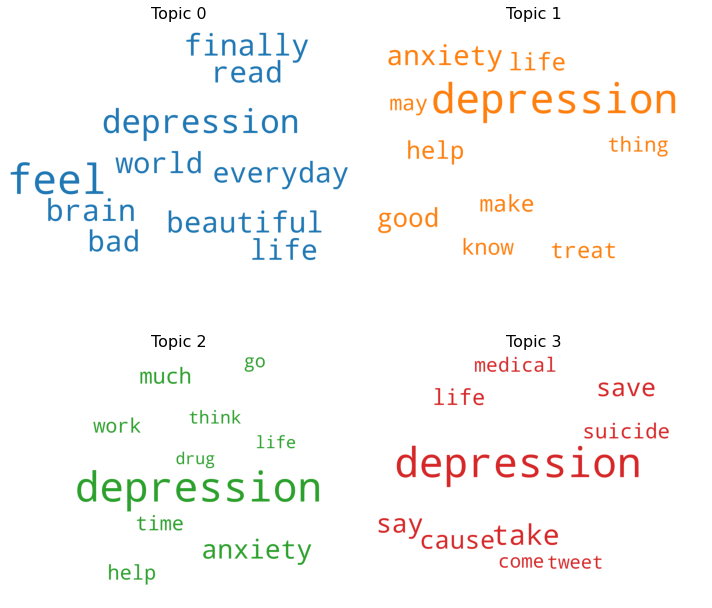

In [53]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [54]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.451488281460405

Coherence Score:  0.3572522369815552


In [55]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.100769  0.134733       1        1  37.001711
1     -0.064281  0.046347       2        1  22.414327
3     -0.080269 -0.187288       3        1  21.668916
0      0.245319  0.006207       4        1  18.915046, topic_info=           Term       Freq       Total Category  logprob  loglift
8          feel  92.000000   92.000000  Default  30.0000  30.0000
40        brain  40.000000   40.000000  Default  29.0000  29.0000
81      finally  39.000000   39.000000  Default  28.0000  28.0000
84         read  38.000000   38.000000  Default  27.0000  27.0000
77    beautiful  37.000000   37.000000  Default  26.0000  26.0000
..          ...        ...         ...      ...      ...      ...
3    depression  48.580118  350.459950   Topic4  -3.0851  -0.3108
250        make  11.373102   37.963585   Topic4  -4.5371   0.4598
341         die   3.696073    8.252860   Topic4  -5.6611   0.8619
162        year   3.478993   27.340837   Topic4  -5.7216  -0.3964
152         end   3.201626    8.590192   Topic4  -5.8047   0.6783

[210 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
936       2  0.917403            able
206       3  0.921214       addiction
0         2  0.978318          always
128       1  0.669083  antidepressant
128       3  0.334542  antidepressant
...     ...       ...             ...
173       2  0.218599           would
162       1  0.548630            year
162       2  0.329178            year
162       4  0.109726            year
413       2  0.898424           young

[210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])